
   

![title](./img/logo.png)  






# <a>Bem vindos ao evento Como se Tornar um Cientista de Dados</a>

## Dia 03 - Predição de Notas de Alunos da Let's Learn

No 1o dia do evento apresentamos as principais dificuldades para se tornar um Cientista de Dados. Com base numa pesquisa e nossa própria experiência, detalhamos o que mais aflige e dificulta a entrada nessa carreira tão desejada. Ainda, analisamos como está o mercado para cientistas de dados no Brasil e nos Estados Unidos (freelance em dólar? nada mal :).

No 2o dia, destacamos detalhadamente um roadmap completo do que devemos estudar e aplicar para inciar bem nessa carreira. Conhecimentos básicos, estatística, matemática, programação, análise exploratória de dados, machine learning, implantação de modelos. 

Finalmente chegamos ao projeto do zero, onde aplicaremos conhecimentos de ciência de dados e de machine learning para criar um modelo preditivo de notas de alunos com base em algumas características. A ideia dessa live é mostrar como funciona um modelo sem entrar em muitos detalhes, mas apresentando as principais etapas de um projeto de ciência de dados desde o início até a implantação.

O foco do cientista de dados sempre deve ser a solução de problemas de negócio! Aqui podemos imaginar uma aplicação em políticas públicas para educação, ou mesmo direcionamento de aprendizagem de alunos por parte de uma empresa de educação. 

Você pode baixar os dados que vamos utilizar nesse projeto diretamente no [Kaggle](https://www.kaggle.com/uciml/student-alcohol-consumption), mas tem origem no site da [UCI](https://archive.ics.uci.edu/ml/datasets/student+performance)

De acordo com o Kaggle (tradução livre), "Os dados foram obtidos em uma pesquisa com alunos dos cursos de matemática e língua portuguesa do ensino médio. Ele contém muitas informações sociais, de gênero e de estudo interessantes sobre os alunos. Você pode usá-lo para algum EDA ou tentar prever a nota final dos alunos."

Essa é uma base de um estudo de alunos portuguses. A fonte dos dados são dos pesquisadores:
- P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
- Fabio Pagnotta, Hossain Mohammad Amran. Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it
University Of Camerino


Como nosso problema é prever as notas dos estudantes, uma variável numérica contínua, temos um exemplo de problema de regressão. 

Assim como estamos fazendo para notas de alunos, podemos abstrair para outras tantas aplicações de regressão: valores de imóveis, de carros, séries temporais diversas (quantidade de chuva em mm, duração de estoque de produtos, etc).

O notebook inicial foi obtido no [Kaggle](https://www.kaggle.com/mohaiminul101/student-grade-prediction-and-eda/notebook). Ele está bem básico e acrescentamos o uso de outros algoritmos e cross validation que não estão lá.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

### Carregar a base de dados!

Sempre gosto de criar uma pastinha "data" pra organizar. Utilizamos pandas pra carregar os dados. Se ainda não conhece, a gente tem dois vídeos introdutórios, acesso [aqui](https://www.youtube.com/watch?v=iOjtCIcU3HQ) e [aqui](https://www.youtube.com/watch?v=5Ja_f8Q3IHw) :)

Mais ainda, para os dados brutos (não transformados) temos a pasta "raw" e a pasta "processed" fica para os dados tratados.

In [2]:
# Carregando as bases para dataframes pandas
notas_matematica = pd.read_csv("./data/raw/student-mat.csv")
notas_portugues = pd.read_csv("./data/raw/student-por.csv")

In [3]:
# olhar as 1as 5 linhas
display(notas_matematica.head())
notas_portugues.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
notas_matematica.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### <a>Significado dos atributos (features)</a>

Variáveis indepententes

- school - escola (binária 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)
- sex - sexo (binária 'F' - feminino ou 'M' - masculino)
- age - idade (numeric: de 15 a 22)
- address - tipo de endereço (binária 'U' - urbano ou 'R' - rural)
- famsize - tamanho da família (binária 'LE3' - 3 ou menos vs 'GT3' - mais que 3)
- Pstatus - status de cohabitação com pais (binária 'T' - living together ou 'A' - apart)
- Medu - educação da mãe (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education ou 4 – higher education)
- Fedu - educação do pai (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education ou 4 – higher education)
- Mjob - trabalho da mãe (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative ou police), 'at_home' ou 'other')
- Fjob - trabalho do pai (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative ou police), 'at_home' ou 'other')
- reason - razão pela escolha da escola (nominal: close to 'home', school 'reputation', 'course' preference ou 'other')
- guardian - tutor (nominal: 'mother', 'father' ou 'other')
- traveltime - tempo entre casa e escola (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, ou 4 - >1 hour)
- studytime - horas de estudo nos fins de semana (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, ou 4 - >10 hours)
- failures - número de "bombas" em matérias anteriores (numeric: n if 1<=n<3, else 4)
- schoolsup - suporte educacional extra (binária yes ou no)
- famsup - suporte educacional da família (binária yes ou no)
- paid - aulas extra da matéria (Matemática ou Português) pagas "por fora"  (binária yes ou no)
- activities - atividades extra-curricular (binária yes ou no)
- nursery - estudou no maternal (binária yes ou no)
- higher - tem interesse numa educação de nível superior (binária yes ou no)
- internet - acesso à internet em casa (binária yes ou no)
- romantic - num relacionamento romântico (binária yes ou no)
- famrel - qualidade de relação familiar (numeric: from 1 - very bad to 5 - excellent)
- freetime - tempo livre depois da escola (numeric: from 1 - very low to 5 - very high)
- goout - sai com amigos (numeric: from 1 - very low to 5 - very high)
- Dalc - consumo de álcool durante a semana (numeric: from 1 - very low to 5 - very high)
- Walc - consumo de álcool nos fins de semana (numeric: from 1 - very low to 5 - very high)
- health - estado de saúde atual (numeric: from 1 - very bad to 5 - very good)
- absences - número de faltas na escola (numeric: from 0 to 93)

Variáveis dependentes (notas de cada matéria)

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

In [5]:
# Como temos notas de matemática e de português, vamos renomear as colunas antes de juntar os dataframes

notas_matematica = notas_matematica.rename(columns={'G1':'G1_Mat', 'G2':'G2_Mat', 'G3':'G3_Mat'})
notas_portugues = notas_portugues.rename(columns={'G1':'G1_Por', 'G2':'G2_Por', 'G3':'G3_Por'})

In [6]:
notas_portugues.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1_Por,G2_Por,G3_Por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
# Numero de linhas e colunas
notas_matematica.shape, notas_portugues.shape

((395, 33), (649, 33))

### <a>Predição de Notas</a>

Como temos mais notas de português do que matemática, vamos utilizar os dados com mais observações! 

In [8]:
df_notas = notas_portugues
del notas_matematica

In [9]:
# Informacoes basicas das colunas e valores
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [10]:
# Avaliando valores faltantes
df_notas.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1_Por        0
G2_Por        0
G3_Por        0
dtype: int64

### Uma EDA simples pra verificar possíveis correlações e entender melhor a base

In [11]:
df_notas.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1_Por,G2_Por,G3_Por
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [12]:
df_notas['G3_Por'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3_Por, dtype: float64

<AxesSubplot:xlabel='school', ylabel='count'>

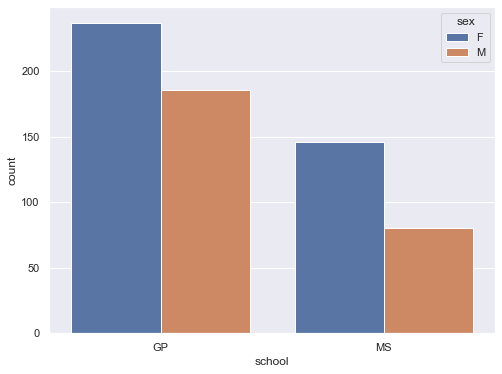

In [13]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="school", hue ="sex", data=df_notas)

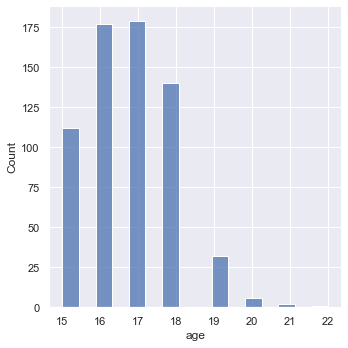

In [14]:
sns.displot(df_notas['age'])

In [15]:
df_notas['famsize'].value_counts(normalize=True)

GT3    0.70416
LE3    0.29584
Name: famsize, dtype: float64

In [16]:
print("%s%% dos estudantes moram numa família com mais de 3 membros" % (100*round(df_notas['famsize'].value_counts(normalize=True)[0],4)))

70.42% dos estudantes moram numa família com mais de 3 membros


<AxesSubplot:xlabel='school', ylabel='count'>

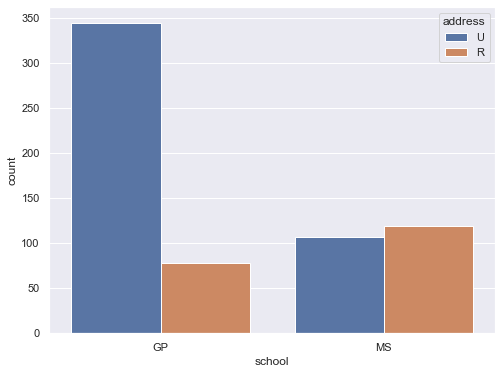

In [17]:
# Urbano ou rural?
sns.countplot(x="school", hue ="address", data=df_notas)

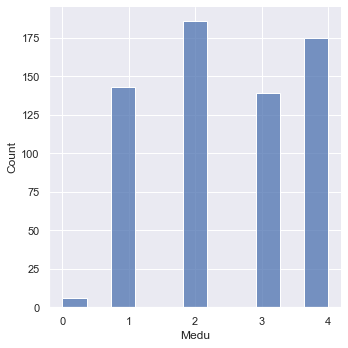

In [18]:
sns.displot(df_notas['Medu'])

<AxesSubplot:xlabel='Mjob', ylabel='count'>

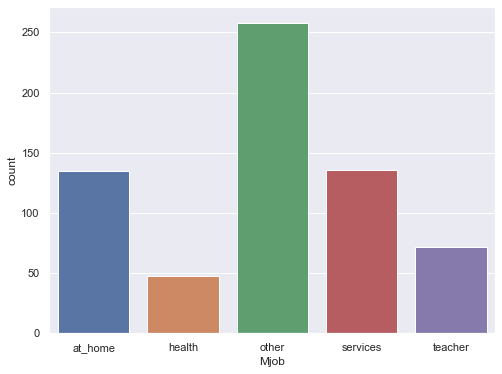

In [19]:
# Avaliando o trabalho da mãe
sns.countplot(data=df_notas, x='Mjob')

<AxesSubplot:xlabel='Fjob', ylabel='count'>

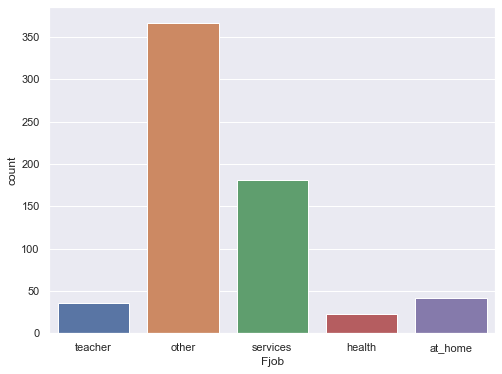

In [20]:
# Avaliando o trabalho do pai
sns.countplot(data=df_notas, x='Fjob')

In [21]:
df_notas.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Por', 'G2_Por', 'G3_Por'],
      dtype='object')

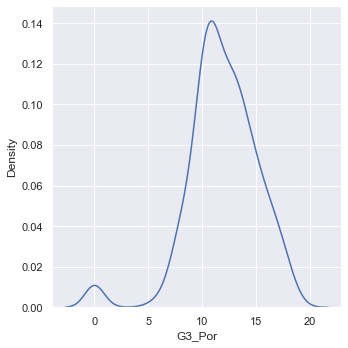

In [22]:
# Avaliando o trabalho do pai
sns.displot(data=df_notas, x='G3_Por', kind='kde')

<AxesSubplot:xlabel='reason', ylabel='count'>

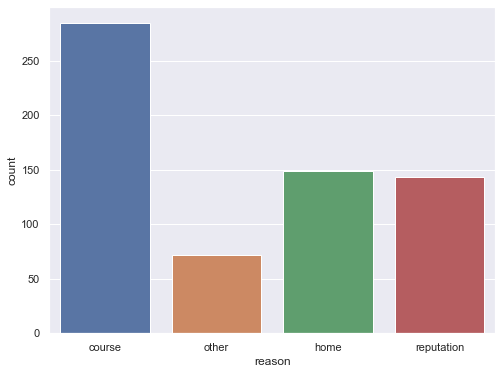

In [23]:
# Avaliando a razão pode ter escolhido a escola
sns.countplot(data=df_notas, x='reason')

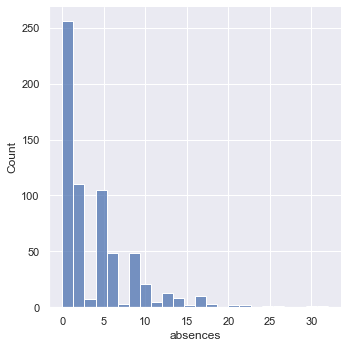

In [24]:
sns.displot(df_notas['absences'])

<AxesSubplot:xlabel='G3_Por', ylabel='Fjob'>

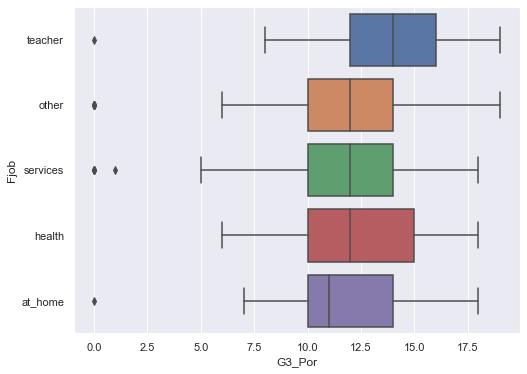

In [25]:
# Vamos tentar avaliar se a nota é influenciada por alguma das características utilizando boxplots
sns.boxplot(data=df_notas, x='G3_Por', y='Fjob')

<AxesSubplot:xlabel='G3_Por', ylabel='Mjob'>

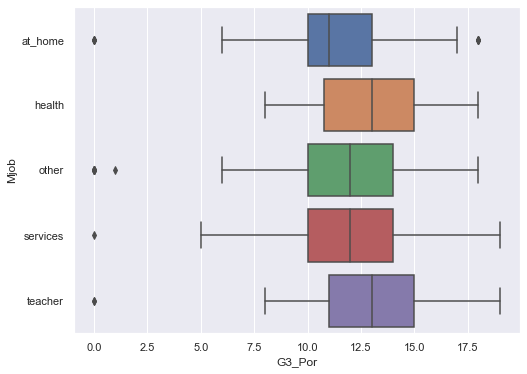

In [26]:
sns.boxplot(data=df_notas, x='G3_Por', y='Mjob')

<AxesSubplot:xlabel='G3_Por', ylabel='Medu'>

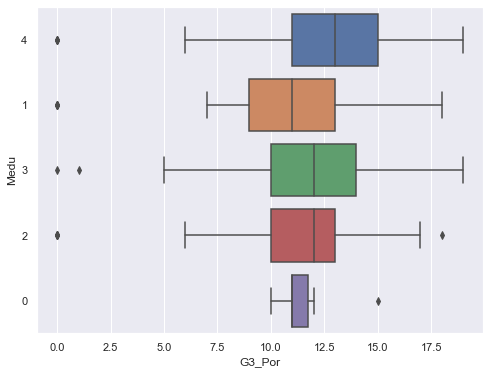

In [27]:
# Avaliando as notas em comparação com a educação masculina

df_notas['Medu'] = df_notas['Medu'].astype(str)
sns.boxplot(data=df_notas, x='G3_Por', y='Medu')

<AxesSubplot:xlabel='G3_Por', ylabel='Fedu'>

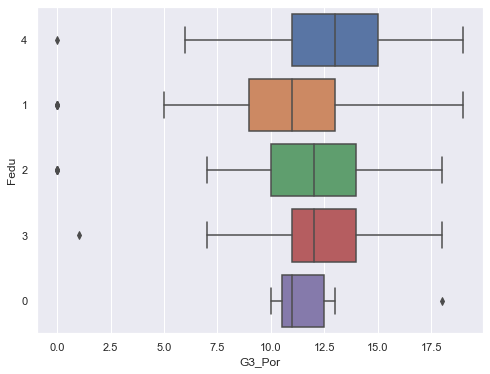

In [28]:
# Avaliando as notas em comparação com a educação feminina

df_notas['Fedu'] = df_notas['Fedu'].astype(str)
sns.boxplot(data=df_notas, x='G3_Por', y='Fedu')

<AxesSubplot:xlabel='G3_Por', ylabel='internet'>

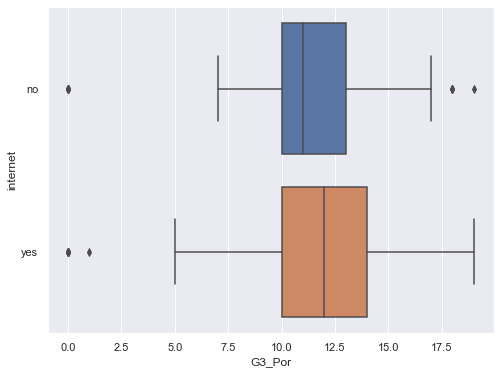

In [29]:
sns.boxplot(data=df_notas, x='G3_Por', y='internet')

<AxesSubplot:xlabel='G3_Por', ylabel='nursery'>

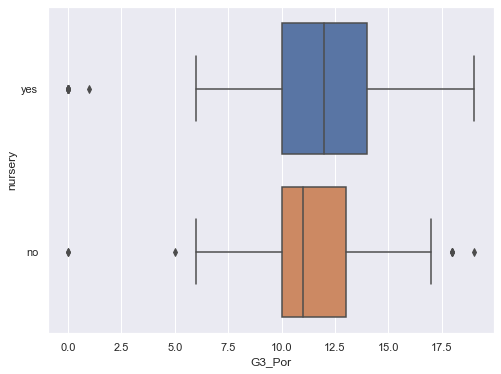

In [30]:
sns.boxplot(data=df_notas, x='G3_Por', y='nursery')

<AxesSubplot:xlabel='G3_Por', ylabel='studytime'>

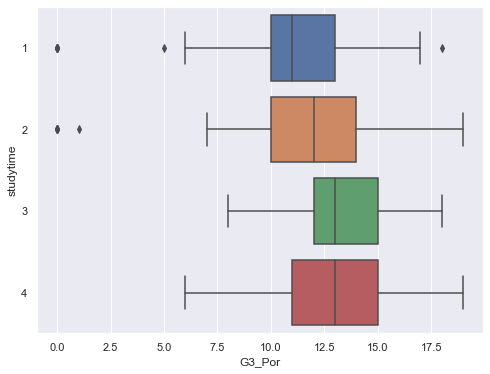

In [31]:
df_notas['studytime'] = df_notas['studytime'].astype(str)
sns.boxplot(data=df_notas, x='G3_Por', y='studytime', order=['1', '2', '3', '4'])

In [32]:
df_notas['studytime'] = df_notas['studytime'].astype(int)

<AxesSubplot:xlabel='G3_Por', ylabel='Dalc'>

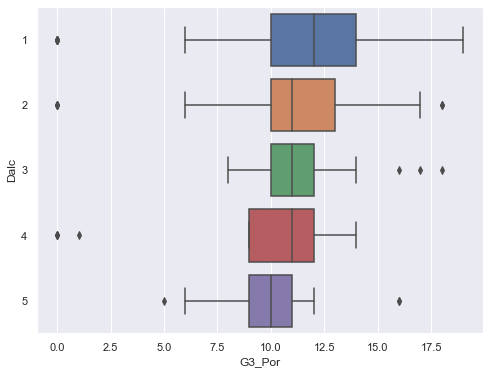

In [33]:
df_notas['Dalc'] = df_notas['Dalc'].astype(str)
sns.boxplot(data=df_notas, x='G3_Por', y='Dalc', order=['1', '2', '3', '4', '5'])

<AxesSubplot:xlabel='G3_Por', ylabel='Walc'>

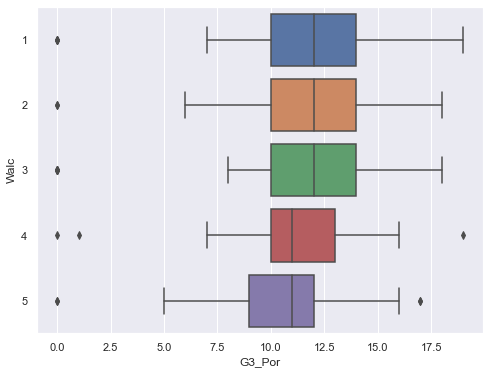

In [34]:
df_notas['Walc'] = df_notas['Walc'].astype(str)
sns.boxplot(data=df_notas, x='G3_Por', y='Walc', order=['1', '2', '3', '4', '5'])

In [35]:
df_notas['Medu'] = df_notas['Medu'].astype(int)
df_notas['Fedu'] = df_notas['Fedu'].astype(int)
df_notas['Walc'] = df_notas['Walc'].astype(int)
df_notas['Dalc'] = df_notas['Dalc'].astype(int)
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int32 
 7   Fedu        649 non-null    int32 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int32 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### Separando variáveis preditoras e target

In [36]:
# Vamos tentar prever as notas de português, mais especificamente G3 que é a nota final
X = df_notas.drop(['G1_Por', 'G2_Por', 'G3_Por'],axis=1)
Y = df_notas['G3_Por']

In [37]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


In [38]:
X.to_csv('./data/transformed/notas.csv', index=False)

In [39]:
Y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3_Por, Length: 649, dtype: int64

In [40]:
min(Y), max(Y)

(0, 19)

### <a> Codificação de variáveis categóricas</a>

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int32 
 7   Fedu        649 non-null    int32 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int32 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [42]:
X_copia = X.copy()

X = pd.get_dummies(X, drop_first=True)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int32
 2   Fedu               649 non-null    int32
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int32
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int32
 10  Walc               649 non-null    int32
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  school_MS          649 non-null    uint8
 14  sex_M              649 non-null    uint8
 15  address_U          649 non-null    uint8
 16  famsize_LE3        649 non-null    uint8
 17  Pstatus_T       

### <a>Fazendo split (antes de scaling e imputação!!)</a>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2)

In [45]:
X_train.shape, X_test.shape

((486, 39), (163, 39))

## Treinar os modelos!

<a>1. Regressão linear</a>

In [46]:
# Criando objeto de regressao linear
regressao_linear = LinearRegression()

Validação do modelo com cross validation

In [47]:
# Validacao cruzada com mean squared error 
scores_lr = cross_val_score(regressao_linear, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores_lr

array([-9.18606042, -7.8655248 , -8.87148395, -6.45782019, -6.94652306])

In [48]:
scores_lr.mean()

-7.865482484893661

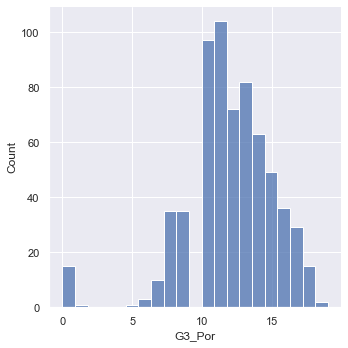

In [49]:
sns.displot(data=Y)

<a>2. Random Forest</a>

In [50]:
# Criando objeto de random forest
rf_regressor = RandomForestRegressor()

In [51]:
# Validacao cruzada com acurácia de métrica
scores_rf = cross_val_score(rf_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores_rf

array([-8.43592857, -7.37219897, -7.44383918, -5.43980412, -6.93864948])

In [52]:
scores_rf.mean()

-7.126084064801178

### Temos o campeao?? Então podemos treinar na base de treino

In [53]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

### Cadê o teste??? Rá, o teste sempre depois de escolher o modelo CAMPEÃO

In [54]:
# Predições na base de teste
predicoes = rf_regressor.predict(X_test)

In [55]:
error_score = mean_squared_error(y_test, predicoes)
print("MSE : ", error_score)

MSE :  8.099720858895706


### Modelo pronto, validado e testado!!! Hora de "empacotar" pra usar na aplicação

In [56]:
import joblib

with open('./models/regressor.pkl', 'wb') as arquivo_modelo:
    joblib.dump(rf_regressor, arquivo_modelo,compress=3)
    
